### PCA 개요 

In [17]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)  
##비지도학습에서는 label을 쓰지 않지만 우선 만들어주기는 했다. 

sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0

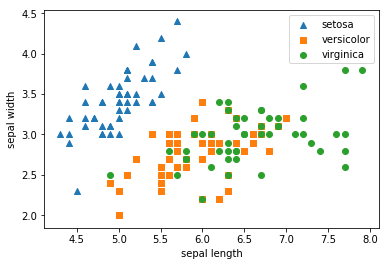

In [18]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']  
##markers를 이용해서 모양으로 표현

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
##legend를 그래프 안에 위치하도록 하는것. 별도의 설정이 없으면 자동으로 최적이라 생각하는 위치에 만들어준다. 
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()  
##2개정도만 있어도 전체 데이터의 변동성을 충분히 설명할 수 있을 것이다. 

In [19]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
from sklearn.decomposition import PCA
##PCA:Principal component analysis orthogonal transformation으로 변환하는 것
pca = PCA().fit(iris_scaled)
np.cumsum(pca.explained_variance_ratio_) 
##이게 람다1, 람다 2...람다n을 볼 수 있게 하는 것(람다2까지 이미 90%를 넘었으니까 2개만 남겨도 충분한 설명력을 가지겠구나 생각하는 것)

array([0.76740358, 0.95023085, 0.98747608, 0.9958933 , 1.        ])

In [7]:


pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

pca_component_1  pca_component_2  target
0        -2.576120         0.474499       0
1        -2.415322        -0.678092       0
2        -2.659333        -0.348282       0

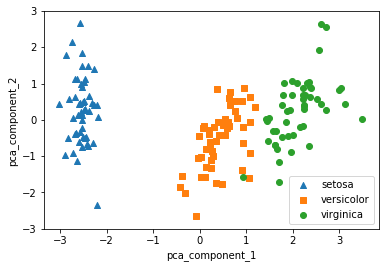

In [9]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [10]:
print(pca.explained_variance_ratio_)
##The pca.explained_variance_ratio_ parameter returns a vector of the variance explained by each dimension.
##pca.explained_variance_ratio_[i]는 i+1번째 차원이 설명하는 variance를 나타내는 것.

[0.76740358 0.18282727]


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=100)
#n-estimators: numbers of trees in the forest
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores) 
##예측 정확성(testset을 random으로 돌린건데 그걸 세번 cv=3을 해서 값이 3개 나온 것)

[0.98039216 0.94117647 0.97916667]


In [16]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
#corss_val_score: test-set이 바뀜에 따라 estimator performance를 측정하는 것
print(scores_pca)

[0.98039216 0.96078431 1.        ]
